In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# Read in data files
in_care_df = pd.read_csv("Data/in_care.txt", sep='\t')
adopted_df = pd.read_csv("Data/adopted.txt", sep='\t')
tpr_df = pd.read_csv("Data/tpr.txt", sep='\t')

In [3]:
adopted_df.head()

,Status,State,FY 2010,FY 2011,FY 2012,FY 2013,FY 2014,FY 2015,FY 2016,FY 2017,FY 2018,FY 2019
0,Adopted,Alabama,606.0,447.0,587.0,532.0,544.0,512.0,503.0,504.0,712.0,738.0
1,Adopted,Alaska,336.0,293.0,309.0,328.0,367.0,357.0,312.0,366.0,353.0,396.0
2,Adopted,Arizona,2045.0,2275.0,2275.0,2522.0,3090.0,3236.0,3654.0,4298.0,3926.0,3373.0
3,Adopted,Arkansas,597.0,591.0,703.0,691.0,743.0,740.0,758.0,971.0,1001.0,984.0
4,Adopted,California,6459.0,5710.0,5938.0,5541.0,5471.0,6079.0,6542.0,6524.0,6966.0,6981.0


## Clean DataFrame

In [4]:
# Keep only numerical data
years_df = adopted_df.drop(["Status","State"], axis=1)

In [5]:
years_df.columns

Index(['FY 2010', 'FY 2011', 'FY 2012', 'FY 2013', 'FY 2014', 'FY 2015',
       'FY 2016', 'FY 2017', 'FY 2018', 'FY 2019'],
      dtype='object')

In [6]:
# Create list of years in dataset
years_list = []

for column in years_df.columns:
    year = column.split(" ")[1]
    years_list.append(int(year))

In [7]:
# Check shape 
years = np.array(years_list).reshape(-1,1)
years.shape

(10, 1)

In [8]:
# Store 
states = adopted_df["State"].values.tolist()

## Machine Learning

In [9]:
# Import dependencies
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
# Train and score model, then demonstrate predictive ability for all states

midwest = ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 
           'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin']
plot_indexes = []

for index,row in years_df.iterrows():
    values = row.values.tolist()
    X = years
    y = values
    
    model = LinearRegression()

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    state = states[index]
    predicted = model.predict([[2025]])
    
    print(f"{state} Score: {score}")
    print(f"Prediction for 2025 Adoption: {predicted}")
    print("----------------------------")
    
    if (state in midwest) and score > .8:
        plot_indexes.append(index)

Alabama Score: 0.24401425707628244
Prediction for 2025 Adoption: [638.95049505]
----------------------------
Alaska Score: 0.5454298228276899
Prediction for 2025 Adoption: [413.99009901]
----------------------------
Arizona Score: 0.9883077471149223
Prediction for 2025 Adoption: [5363.84158416]
----------------------------
Arkansas Score: 0.8867998394495706
Prediction for 2025 Adoption: [1241.48019802]
----------------------------
California Score: 0.7299439848680286
Prediction for 2025 Adoption: [7249.12871287]
----------------------------
Colorado Score: -0.022866979471212412
Prediction for 2025 Adoption: [870.42574257]
----------------------------
Connecticut Score: 0.24054125356937184
Prediction for 2025 Adoption: [514.27722772]
----------------------------
Delaware Score: -0.06627317005160993
Prediction for 2025 Adoption: [155.22277228]
----------------------------
District of Columbia Score: -7.856689907851976
Prediction for 2025 Adoption: [72.47524752]
--------------------------

In [11]:
# Create DataFrame for plotting predictions of Midwestern states with model scores greater than 80%
plots_df = years_df.iloc[plot_indexes,:]

In [12]:
plots_df_final = plots_df.copy()

In [13]:
# Use model to 

predicted_years = [2020,2022,2024,2026,2028,2030]

for year in predicted_years:
    predictions = []
    for index,row in plots_df.iterrows():
        values = row.values.tolist()
        X = years
        y = values
        
        model = LinearRegression()
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
        model.fit(X_train, y_train)
        
        prediction = model.predict([[year]])
        predictions.append(prediction[0])

    plots_df_final[f"FY {year}"] = predictions

In [14]:
plots_df_final

,FY 2010,FY 2011,FY 2012,FY 2013,FY 2014,FY 2015,FY 2016,FY 2017,FY 2018,FY 2019,FY 2020,FY 2022,FY 2024,FY 2026,FY 2028,FY 2030
15,801.0,864.0,1032.0,917.0,878.0,1017.0,992.0,1006.0,1074.0,1228.0,1174.101485,1244.086634,1314.071782,1384.056931,1454.042079,1524.027228
23,627.0,572.0,520.0,583.0,642.0,735.0,899.0,946.0,1284.0,1347.0,1263.574257,1431.831683,1600.089109,1768.346535,1936.603960,2104.861386
25,1170.0,1212.0,1228.0,1233.0,1291.0,1357.0,1591.0,1541.0,1798.0,1820.0,1826.084158,1975.242574,2124.400990,2273.559406,2422.717822,2571.876238
34,145.0,119.0,155.0,104.0,96.0,133.0,132.0,162.0,172.0,197.0,172.103960,183.064356,194.024752,204.985149,215.945545,226.905941


## Prediction

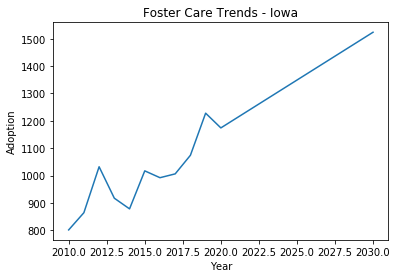

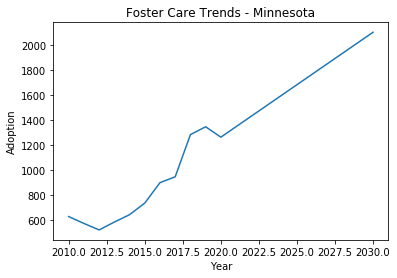

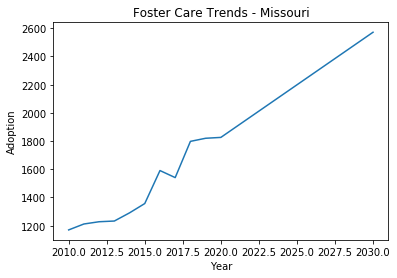

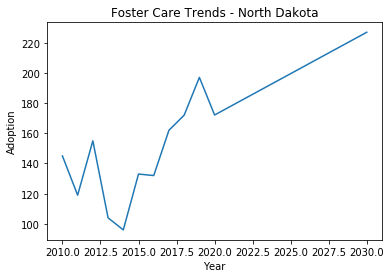

In [15]:
for index,row in plots_df_final.iterrows():
    values = row.values.tolist()
    X = years_list + predicted_years
    y = values

    plt.plot(X, y)
    plt.xlabel("Year")
    plt.ylabel(f"Adoption")
    plt.title(f"Foster Care Trends - {states[index]}")
    
    
    plt.savefig(f"Images/{states[index]}_Adoption.png")
    plt.show()